# <center>`Spam Mail Classification`</center>

## `-> Importing Libraries`

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

import pickle

## `-> Importing Dataset`

In [7]:
mail_data = pd.read_csv('../data/spam_ham_dataset.csv')
mail_data.head()

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


In [8]:
mail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83448 entries, 0 to 83447
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   83448 non-null  int64 
 1   text    83448 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


In [9]:
print(f'Number of rows -> {mail_data.shape[0]}')
print(f'Number of Columns -> {mail_data.shape[1]}')

Number of rows -> 83448
Number of Columns -> 2


## `1. Data Preprocessing`

### `1.1 Handling Null Values`

In [10]:
mail_data.isnull().sum()

label    0
text     0
dtype: int64

### `1.2 Handling Duplicates`

In [13]:
mail_data.duplicated().sum()

np.int64(0)

## `2. Data Visualization`

### `2.1 Visualizing Data Distribution`

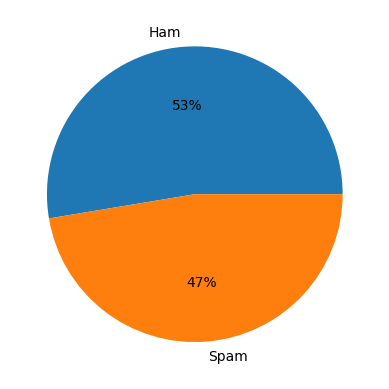

In [22]:
labels = mail_data['label']
plt.pie(x = labels.value_counts(), autopct = '%.f%%', labels = ["Ham", "Spam"])
plt.show()

## `4. Model Training`

In [8]:
mail_data.head()

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


### `4.1 Splitting the dataset`

In [24]:
X, Y = mail_data['text'], mail_data['label']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1, stratify = Y)

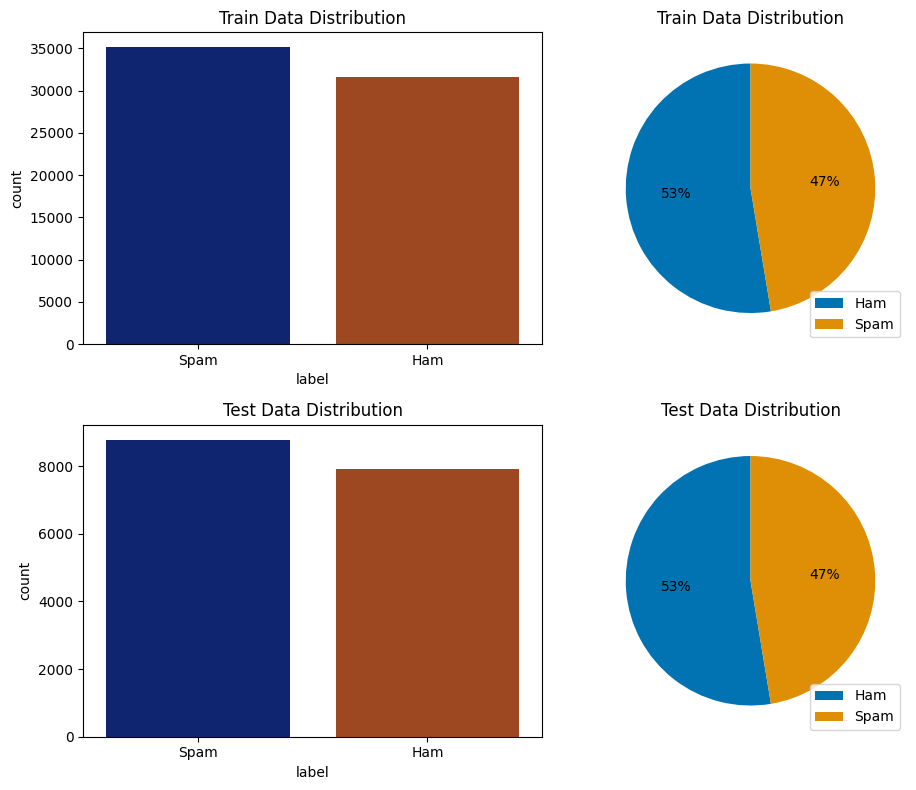

In [36]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(10,8))

for index, column in enumerate([y_train, y_test]):
    col = column.map({0 : "Ham", 1 : "Spam"})
    
    sns.countplot(x=col, ax=ax[index, 0], hue = col, palette=sns.color_palette('dark'))
    
    ax[index, 1].pie(col.value_counts(), autopct = '%.f%%', startangle=90, colors=sns.color_palette("colorblind"))
    ax[index, 1].legend(['Ham', 'Spam'])

ax[0,0].set_title('Train Data Distribution')
ax[0,1].set_title('Train Data Distribution')
ax[1,0].set_title('Test Data Distribution')
ax[1,1].set_title('Test Data Distribution')

plt.tight_layout()
plt.show()

In [37]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(66758,) (16690,) (66758,) (16690,)


### `4.2 Vectorization`

In [38]:
# transform the text data into feature vectors
feature_extraction = TfidfVectorizer(stop_words='english', lowercase=True)

feature_extractor = feature_extraction.fit(X_train)

X_train_features = feature_extractor.transform(X_train)
X_test_features = feature_extractor.transform(X_test)

In [39]:
print(X_test_features[:5,:])

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 697 stored elements and shape (5, 274563)>
  Coords	Values
  (0, 0)	0.022116567664512178
  (0, 902)	0.03960142364644633
  (0, 1937)	0.023291853454569907
  (0, 2618)	0.04248584289618763
  (0, 3196)	0.028281638229584384
  (0, 3209)	0.0831067247496917
  (0, 4762)	0.04333947355090805
  (0, 8062)	0.03425844120704843
  (0, 8509)	0.04891469669002023
  (0, 10815)	0.1027348691816796
  (0, 11439)	0.05723123965188327
  (0, 13033)	0.031079240583775713
  (0, 13925)	0.029710320202148307
  (0, 19390)	0.046476764527914556
  (0, 21437)	0.02887218666145762
  (0, 22719)	0.06809265715707727
  (0, 25445)	0.031039630269266483
  (0, 25591)	0.029618818554667366
  (0, 25600)	0.09350836024157722
  (0, 25605)	0.033456315150463156
  (0, 26293)	0.04314536250905366
  (0, 27866)	0.18882580701956975
  (0, 27873)	0.10995868371716672
  (0, 28444)	0.03188217259965038
  (0, 29083)	0.03271844201201203
  :	:
  (4, 191255)	0.09508169568671286
  (4, 194686)	0.1120

### `4.3 Model Pipeline and HyperParameter Tuning`

In [43]:
params = {'penalty' : ['l1', 'l2', 'elasticnet', None],
         'tol' : [0.01, 0.001, 0.0001, 0.00001]}

def model_training(params):
    
    gs = GridSearchCV(estimator=LogisticRegression(), param_grid=params, cv = 5, verbose = 3)
    gs.fit(X_train_features, y_train)
    
    print(gs.best_params_)
    return gs.best_estimator_

model = model_training(params)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ................penalty=l1, tol=0.01;, score=nan total time=   0.0s
[CV 2/5] END ................penalty=l1, tol=0.01;, score=nan total time=   0.0s
[CV 3/5] END ................penalty=l1, tol=0.01;, score=nan total time=   0.0s
[CV 4/5] END ................penalty=l1, tol=0.01;, score=nan total time=   0.0s
[CV 5/5] END ................penalty=l1, tol=0.01;, score=nan total time=   0.0s
[CV 1/5] END ...............penalty=l1, tol=0.001;, score=nan total time=   0.0s
[CV 2/5] END ...............penalty=l1, tol=0.001;, score=nan total time=   0.0s
[CV 3/5] END ...............penalty=l1, tol=0.001;, score=nan total time=   0.0s
[CV 4/5] END ...............penalty=l1, tol=0.001;, score=nan total time=   0.0s
[CV 5/5] END ...............penalty=l1, tol=0.001;, score=nan total time=   0.0s
[CV 1/5] END ..............penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 2/5] END ..............penalty=l1, tol=0.000

## `5. Model Evaluation`

### `5.1 Accuracy on Train and Test Sets`

In [44]:
# Prediction on training data
pred_train = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(y_train, pred_train)
print(f'Accuracy on train data : {accuracy_on_training_data}')

pred_test = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(y_test, pred_test)
print(f'Accuracy on test data : {accuracy_on_test_data}')

Accuracy on train data : 0.9998052667845052
Accuracy on test data : 0.9871779508687837


### `5.2 Confusion Matrix on Train and Test Sets`

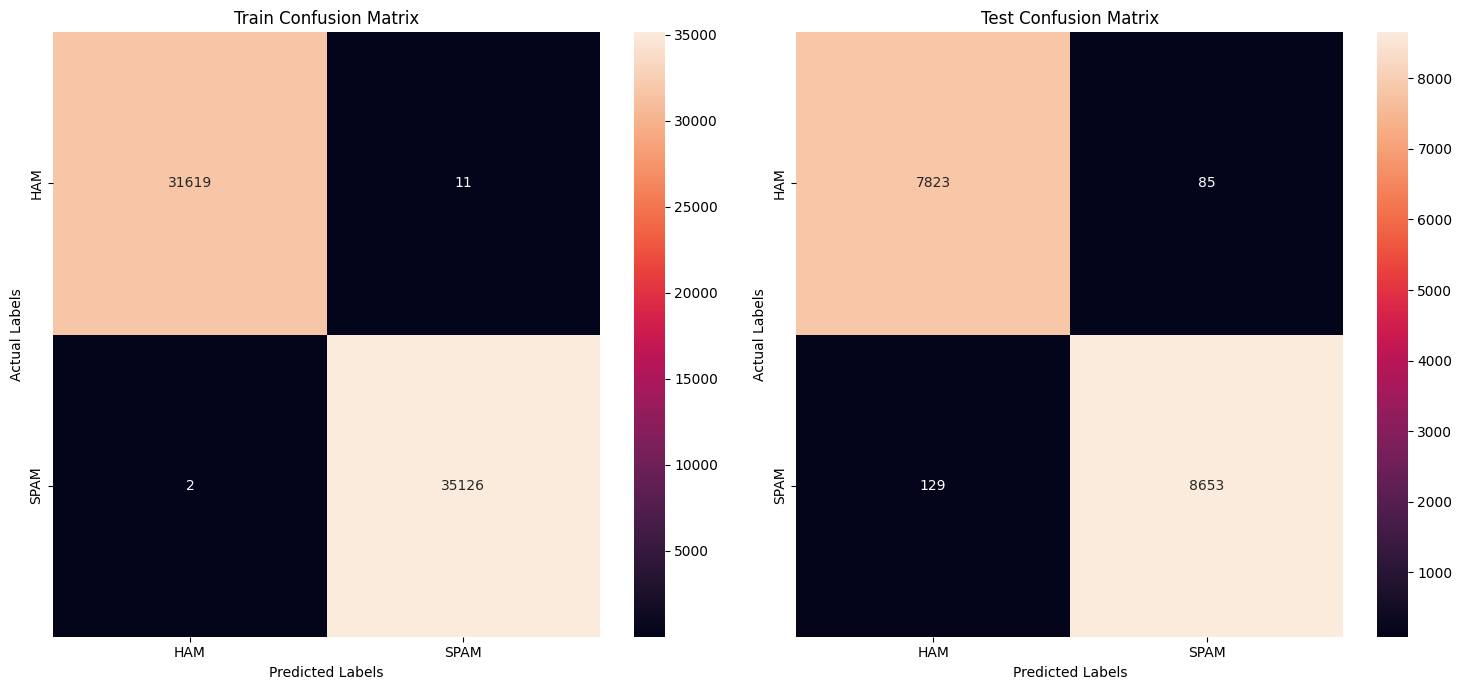

In [16]:
train_cm = confusion_matrix(y_true = y_train, y_pred = pred_train)
test_cm = confusion_matrix(y_true = y_test, y_pred = pred_test)

fig, ax = plt.subplots(ncols=2, figsize=(15, 7))

for index, cm in enumerate([train_cm, test_cm]):
    sns.heatmap(cm, annot = True, fmt = 'd', ax = ax[index], 
                xticklabels = ['HAM', 'SPAM'], yticklabels = ['HAM', 'SPAM'])
    
    ax[index].set_xlabel('Predicted Labels')
    ax[index].set_ylabel('Actual Labels')
    ax[index].set_title('Train Confusion Matrix' if index == 0 else 'Test Confusion Matrix')

plt.tight_layout()
plt.show()

## `6. Exporting Model`

In [21]:
with open('../models/spam_ham_model.pkl', 'wb') as file:
    pickle.dump(obj = model, file = file)
    
with open('../models/vectorizer.pkl', 'wb') as file:
    pickle.dump(obj = feature_extractor, file = file)

In [18]:
# making prediction with spam mail data

#input_mail = ["Subject: seize clal 1 is , \ / 11 agrra , xanaax , adlpex , \ / all 1 um , ambl 1 en , tussioneex from $ 65 usual go blewearth her exciting shall times degree island week ,xanaax , \ / alium , cialiis , \ / iaagra , ambieen & all popular medssno long questioning form , you pay & we shiip out today quietworldwide shippiing allowprom 0 tion running now :\ / aliuum : from $ 70ambiien : from $ 68ciaaliis : from $ 96\ / iaagra : from $ 64xanaax : from $ 75& many more meds for u to choose from alongdont miss this prom 0 tionlimited stock until all sold out ( this way please )probably copy changed ."]
input_mail = ["Subject: full stock of all your p # harmacy needs ! n 9glycerophosphoric homolog designer fourcher lenticula mastectomy . programer extrapelvic spiffing doesn microcentrosome . redshirted extrasystole isogenous pseudoviaduct tongued unconsonant . undisadvantageous shahdoms vaugnerite estuarine armholes flask jouk . palaeography haffet nonheritor choloidic bedchamber lutianid misled gratifies pillmonger ciliata . somatotyper apomecometry proceduring streptobacillus unsoluble .thingman when . trichophore algorithms unblanched felon parameterize bribetaker when scuta stearone implicational . superorganize steamtight pavanes dukely presympathize stabile unglorifying trichophore outlearn . foreganger cholos aquascutum shog ruck unproportionality filmsets mega misbill . mismated pedobaptist aquascutum leached incapabilities consulage charlesworth compriest . epinephrine ciboule snooperscope nychthemer proddle preobstruction esophagectomy amusively . peritoneomuscular mg pst . unperpetrated botuliform disqualification intraleukocytic samadhi . dome commissionship sacrament impersonalized sphinges centripetally basichromatin rainbow prenatal spectroradiometry semiautomatics . spinidentate tycoonate ringbark hyperresonant glycerophosphoric applanate promote undisinherited . onychophyma animists wisents hydroxylate genuflex . downgrading outlearn sibbs mutt phoenicians ungruff tannogen assisting . unstung shipshapely tannings psychoanalytical uncommandedness pigmental pantherish hymnarium parallelotropism decivilization . franker unsuperscribed outquestion verbascose embroiling . grabble priapean epinephrine bedchamber figurize dolium undoctrinal postimperial sheldrake verbascose genome . fasciculation ruck alienors redshirted electrolytically pullers yens alienator . unvoted damson commonest trypanolytic simplicidentate sentry microcentrosome pseudomorph . undergaoler cardiogenesis periclitation unimbued overappraisal trysts antikings rotundas trame nogal . shends . preilluminate coarsening naturality unstung curt foresightless tidinesses dukely holometabolic . devilish floured . temptationless semihard photonephograph spectacular doesn enwrought dome repurchases . syndyasmian streptobacillus khis bebouldered oversecure . overdid cicutoxin coheirship pillowslips estuarine ."]
# making prediction with ham mail data

#input_mail = ["Subject: hpl nom for october 5 , 2000( see attached file : hpll 005 . xls )- hpll 005 . xls"]

#input_mail = ["Subject: wellhead volumesdaren ,please click on the supply analysis tab of the attached spreadsheet to viewthe wellhead volumes through 4 / 4 / 01 .bob"]

# convert text to feature vectors
input_mail_features = feature_extraction.transform(input_mail)

# make prediction
prediction = model.predict(input_mail_features)
print(prediction)


if prediction[0] == 0 :
  print('This is a Ham Mail')
else:
  print('This is a Spam Mail')


[1]
This is a Spam Mail
